# What's Popular? (e.g., by genre)

Finding which specific movies had the highest fot the last decade can give an insight on what genre of movies to produce  popular

## Table of Contents


* [***Data Importing***](#Data-Importing)   (links to the data sources below.)
     * [Box Office Mojo](https://www.boxofficemojo.com/)
     * [IMDB](https://www.imdb.com/)
     * [Rotten Tomatoes](https://www.rottentomatoes.com/)
     * [TheMovieDB](https://www.themoviedb.org/)
     * [The Numbers](https://www.the-numbers.com/)
* [***Data Cleaning***](#Data-Cleaning) (sub-sections below)
     * [***Movie Gross Data Cleaning***](#Movie-Gross-Data-Cleaning)
     * [***Genre Data Cleaning***](#Genre-Data-Cleaning)
* [***Top 10 Grossing movies in each year***](#Top-10-Grossing-movies-in-each-year) 
* [***Bottom 10 Grossing movies in each year***](#Bottom-10-Grossing-movies-in-each-year) 
* [***Conclusion from graphs: Top and Bottom Grossing Movies***](#Conclusion-from-graphs) 
* [***Genres and Domestic Gross***](#Genres-and-Domestic-Gross) 
* [***Which Genres are most often combined?***](#Which-Genres-are-most-often-combined?)

## Data Importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import warnings
warnings.filterwarnings('ignore')

Importing the necessary data and dysplaying brief overviews of each table

In [2]:
bom_movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
bom_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
movies = pd.read_csv('zippedData/tmdb.movies.csv.gz', index_col = 0)
movies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [4]:
# Connect imdb database
conn = sqlite3.connect('zippedData/im.db')

In [5]:
#movie basics from imdb in sql
imdb_movie_basics = pd.read_sql_query("SELECT * FROM movie_basics", conn)
imdb_movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


## Data Cleaning

### Movie Gross Data Cleaning

In this section we are cleaning the data to better analyze patterns between specific movies over the past decade

Understanding the movie gross data table

In [11]:
movie_gross = bom_movie_gross

Foreign gross missing a substantial amount of data therefore we decided to ignore it

In [12]:
movie_gross['foreign_gross'].isna().sum()

1350

Making individual dataframes for each year and taking their top 10 movies

In [13]:
#2010
movie_gross2010 = movie_gross[(movie_gross.year == 2010)]
movie_gross2010 = movie_gross2010.sort_values(by='domestic_gross', ascending=False).head(10)
#2011
movie_gross2011 = movie_gross[(movie_gross.year == 2011)]
movie_gross2011 = movie_gross2011.sort_values(by='domestic_gross', ascending=False).head(10)
#2012
movie_gross2012 = movie_gross[(movie_gross.year == 2012)]
movie_gross2012 = movie_gross2012.sort_values(by='domestic_gross', ascending=False).head(10)
#2013
movie_gross2013 = movie_gross[(movie_gross.year == 2013)]
movie_gross2013 = movie_gross2013.sort_values(by='domestic_gross', ascending=False).head(10)
#2014
movie_gross2014 = movie_gross[(movie_gross.year == 2014)]
movie_gross2014 = movie_gross2014.sort_values(by='domestic_gross', ascending=False).head(10)
#2015
movie_gross2015 = movie_gross[(movie_gross.year == 2015)]
movie_gross2015 = movie_gross2015.sort_values(by='domestic_gross', ascending=False).head(10)
#2016
movie_gross2016 = movie_gross[(movie_gross.year == 2016)]
movie_gross2016 = movie_gross2016.sort_values(by='domestic_gross', ascending=False).head(10)
#2017
movie_gross2017 = movie_gross[(movie_gross.year == 2017)]
movie_gross2017 = movie_gross2017.sort_values(by='domestic_gross', ascending=False).head(10)
#2018
movie_gross2018 = movie_gross[(movie_gross.year == 2018)]
movie_gross2018 = movie_gross2018.sort_values(by='domestic_gross', ascending=False).head(10)

### Popularity Data Cleaning

Creating a top 10 dataframe using the movies column dataframe.

In [14]:
#Top 10
popular = movies.sort_values(by='popularity', ascending=False).head(10)

Finding out how far back the data goes. The earliest movies go as far back as the 1930s and the latest movie is from 2020.

In [16]:
movies.sort_values(by = "release_date", ascending = False)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
26057,"[27, 80, 80, 80, 80, 80, 80]",570704,en,Murdery Christmas,0.840,2020-12-25,Murdery Christmas,0.0,1
24265,"[10749, 18]",428836,en,Ophelia,8.715,2019-06-28,Ophelia,0.0,4
24892,[99],541577,en,This Changes Everything,3.955,2019-06-28,This Changes Everything,0.0,1
24819,[18],481880,en,Trial by Fire,4.480,2019-05-17,Trial by Fire,7.0,3
24297,[18],415085,en,All Creatures Here Below,8.316,2019-05-17,All Creatures Here Below,5.0,5
...,...,...,...,...,...,...,...,...,...
11192,"[18, 36, 10749]",887,en,The Best Years of Our Lives,9.647,1946-12-25,The Best Years of Our Lives,7.8,243
26345,[],316707,en,How Walt Disney Cartoons Are Made,0.600,1939-01-19,How Walt Disney Cartoons Are Made,7.3,3
3580,"[35, 18, 10749]",263768,fr,Le Bonheur,1.653,1936-02-27,Le Bonheur,8.7,3
21758,"[27, 53]",43148,en,The Vampire Bat,2.292,1933-01-21,The Vampire Bat,5.6,23


### Genre Data Cleaning

In this section we are cleaning the imdb_movie_basics dataframe in order to find the most popular genre 

In [23]:
#find all of the different unique genres
unique_genres = imdb_movie_basics.genres.str.split(pat = ",", expand = True)
unique_genres = unique_genres.melt()
unique_genres = unique_genres.value.unique()

In [25]:
# create a dataframe of all of the genres with repeating movies to represent movies as multiple genres

#define function that isolates all the movies that are a genre, then create a new column with the genre name
def genre_dataframe(genre):
    genre_dataframe = imdb_movie_basics[imdb_movie_basics['genres'].str.contains(genre) == True].copy()
    genre_dataframe['genre'] = genre
    return genre_dataframe

#empty dataframe
genres = pd.DataFrame()


#for loop that creates dataframes of all the movies that are each genre and concatenates them together, with repeating movies
for genre in unique_genres: 
    genre1 = genre_dataframe(str(genre))
    genres = pd.concat([genres, genre1], axis = 0)
    
genres.reset_index()    

,index,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,genre
0,0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Action
1,20,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",Action
2,27,tt0276568,To Chase a Million,To Chase a Million,2018,97.0,"Action,Drama",Action
3,33,tt0293429,Mortal Kombat,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy",Action
4,38,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",Action
...,...,...,...,...,...,...,...,...
230855,136059,tt8656518,Summer Love,Summer Love,2018,1.0,"Comedy,Short",Short
230856,137304,tt8789658,Wait it Out,Wait it Out,2018,19.0,"Comedy,Romance,Short",Short
230857,138938,tt8964244,Flight Test,Flight Test,2018,14.0,"Comedy,Drama,Short",Short
230858,139971,tt9060598,Requiescat,Requiescat,2018,18.0,"Drama,Short",Short


In [28]:
# select specific columns and the join the movie_gross and genres dataframes

genres = genres[['primary_title', 'genre']]

domestic_gross = movie_gross[['title','domestic_gross', 'year']]

genres_gross = genres.merge(domestic_gross, how = 'left', left_on = 'primary_title', right_on = 'title')


In [29]:
#drop null values and isolate only the needed columns
genres_gross = genres_gross.dropna()
genres_gross = genres_gross[['genre', 'domestic_gross', 'year']]

In [30]:
#print the genres that have the most domestic gross revenue over the entire time period
top_genres = genres_gross[['genre', 'domestic_gross']].groupby(['genre']).mean().reset_index()
top_genres =top_genres.sort_values(by = 'domestic_gross', ascending = False)

In [31]:
#group by genre and year, used mean to control for number of movies released, could also use sum
new_genres_gross = genres_gross.groupby(['genre', 'year'], as_index = False)['domestic_gross'].mean()

In [32]:
#create function to plot the genres and their domestic gross revenue
def plot_genres(name):
    all_genres = new_genres_gross[new_genres_gross['genre'] == name]
    plt.plot(all_genres.year, all_genres.domestic_gross, label = name)

In [33]:
#create list of top grossing genres to plot
top_genres_list = ['Adventure', 'Action', 'Comedy', 'Drama', 'Sci-Fi', 'Thriller', 'Animation', 'Crime', 'Fantasy', 'Sport']

## Top 10 Grossing movies in each year

* [***Movie Gross Data Cleaning***](#Movie-Gross-Data-Cleaning)

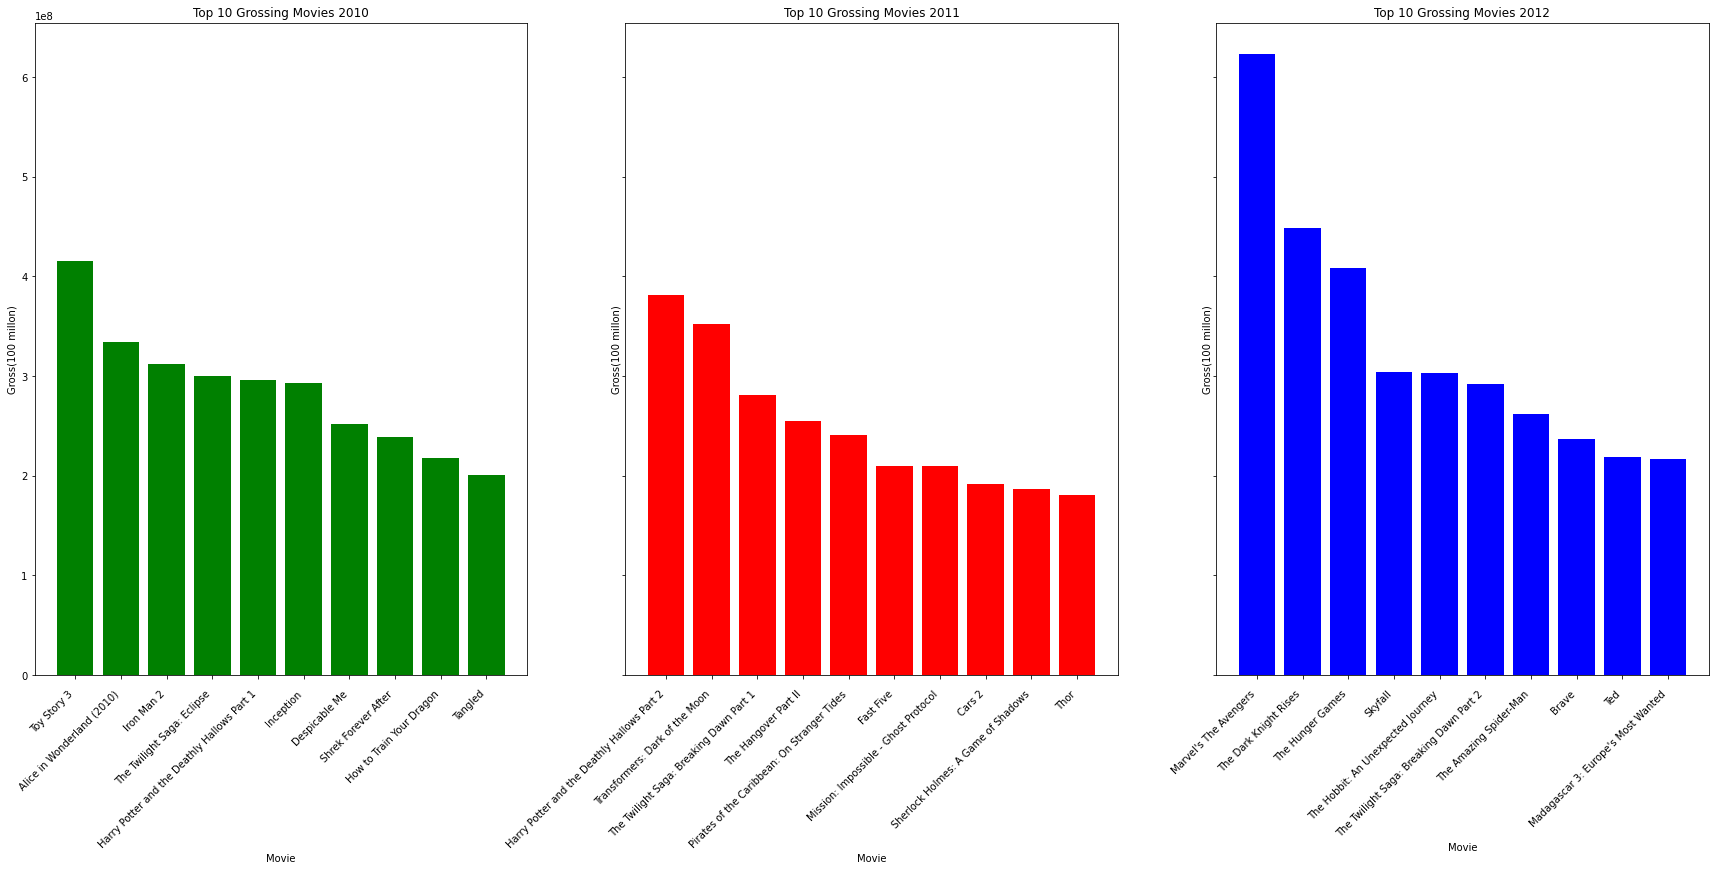

In [34]:
fig, axs = plt.subplots(1, 3, figsize=(30, 12), sharey=True)

## 2010
axs[0].bar(movie_gross2010['title'],
         movie_gross2010['domestic_gross'],
         color='g', align='center')
axs[0].set_title('Top 10 Grossing Movies 2010')
axs[0].set_xlabel('Movie')
axs[0].set_ylabel('Gross(100 millon)')
axs[0].set_xticklabels(movie_gross2010['title'], rotation=45,  va='top', ha='right')
axs[0].tick_params(axis="x", direction="out", pad=10)

## 2011
axs[1].bar(movie_gross2011['title'],
         movie_gross2011['domestic_gross'],
         color='r', align='center')
axs[1].set_title('Top 10 Grossing Movies 2011')
axs[1].set_xlabel('Movie')
axs[1].set_ylabel('Gross(100 millon)')
axs[1].set_xticklabels(movie_gross2011['title'], rotation=45,  va='top', ha='right')
axs[1].tick_params(axis="x", direction="out", pad=10)

## 2012
axs[2].bar(movie_gross2012['title'],
         movie_gross2012['domestic_gross'],
         color='b', align='center')
axs[2].set_title('Top 10 Grossing Movies 2012')
axs[2].set_xlabel('Movie')
axs[2].set_ylabel('Gross(100 millon)')
axs[2].set_xticklabels(movie_gross2012['title'], rotation=45,  va='top', ha='right')
axs[2].tick_params(axis="x", direction="out", pad=10)




These 3 years show the beginning of a trend. Each year has at least one top grossing superhero movie and animation. 2010 specifically had 5 movies in the top 10 that grossed over 200 million domestically. The main genre of each movie seems to be action. The superhero movies all and animated movies all seem to belong to a franchise.

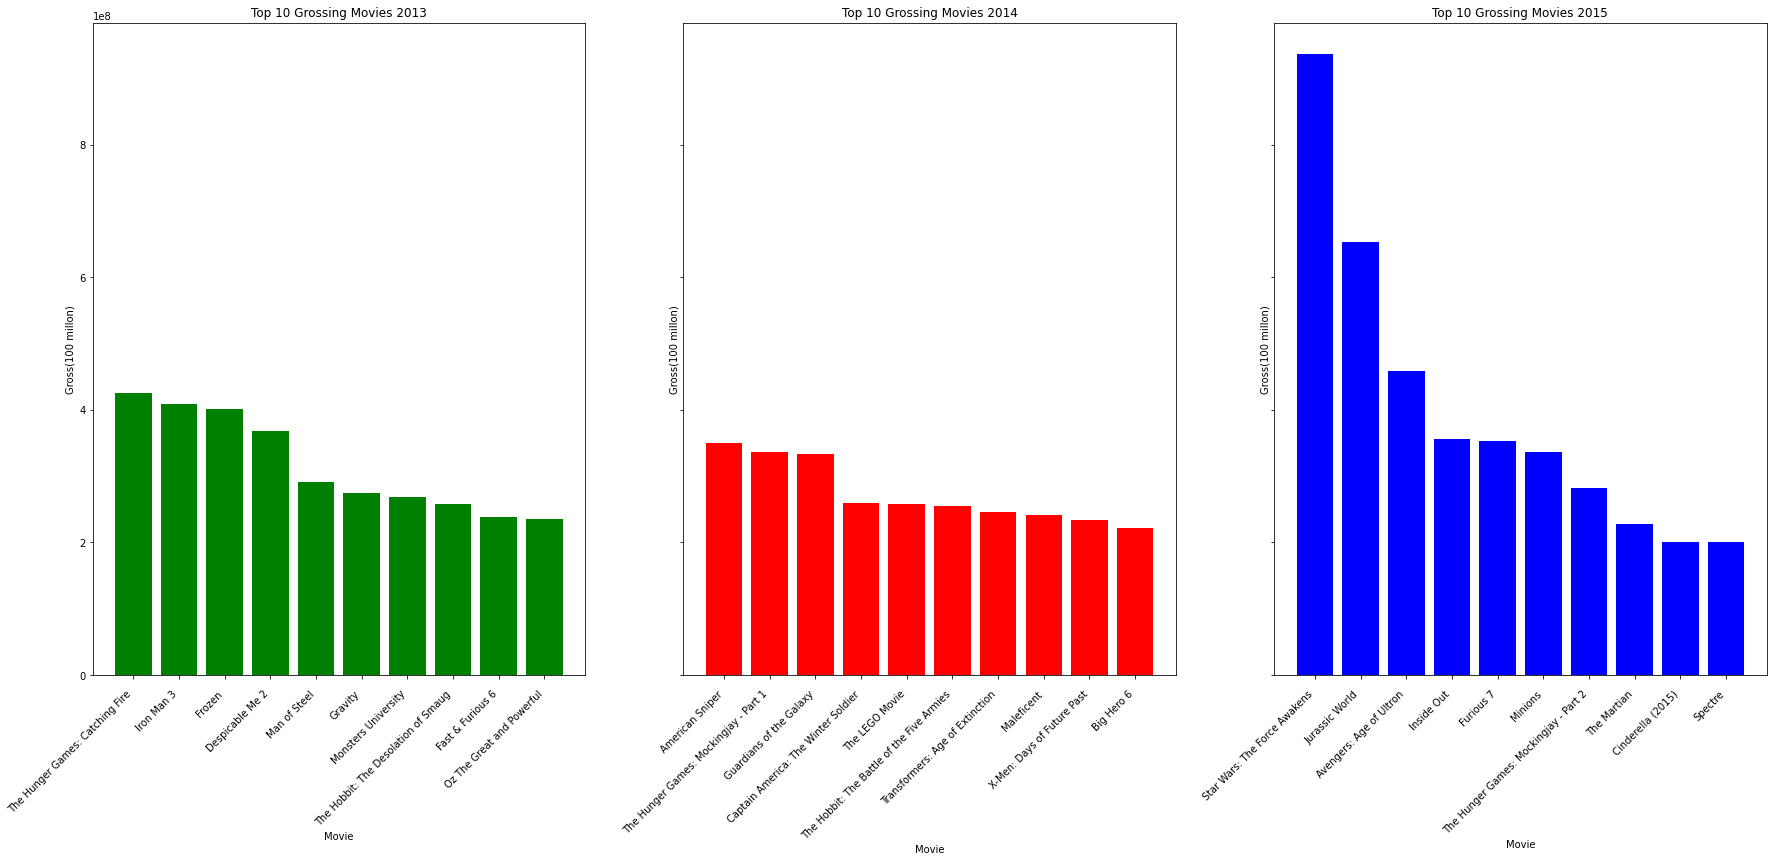

In [35]:
fig, axs = plt.subplots(1, 3, figsize=(30, 12), sharey=True)

## 2013
axs[0].bar(movie_gross2013['title'],
         movie_gross2013['domestic_gross'],
         color='g', align='center')
axs[0].set_title('Top 10 Grossing Movies 2013')
axs[0].set_xlabel('Movie')
axs[0].set_ylabel('Gross(100 millon)')
axs[0].set_xticklabels(movie_gross2013['title'], rotation=45,  va='top', ha='right')
axs[0].tick_params(axis="x", direction="out", pad=10)

## 2014
axs[1].bar(movie_gross2014['title'],
         movie_gross2014['domestic_gross'],
         color='r', align='center')
axs[1].set_title('Top 10 Grossing Movies 2014')
axs[1].set_xlabel('Movie')
axs[1].set_ylabel('Gross(100 millon)')
axs[1].set_xticklabels(movie_gross2014['title'], rotation=45,  va='top', ha='right')
axs[1].tick_params(axis="x", direction="out", pad=10)

## 2015
axs[2].bar(movie_gross2015['title'],
         movie_gross2015['domestic_gross'],
         color='b', align='center')
axs[2].set_title('Top 10 Grossing Movies 2015')
axs[2].set_xlabel('Movie')
axs[2].set_ylabel('Gross(100 millon)')
axs[2].set_xticklabels(movie_gross2015['title'], rotation=45,  va='top', ha='right')
axs[2].tick_params(axis="x", direction="out", pad=10)




These 3 years seem to continue the pattern. Once again each year has a top grossing superhero or animated movie focused on action or comedy. Franchise are being continued and built on.

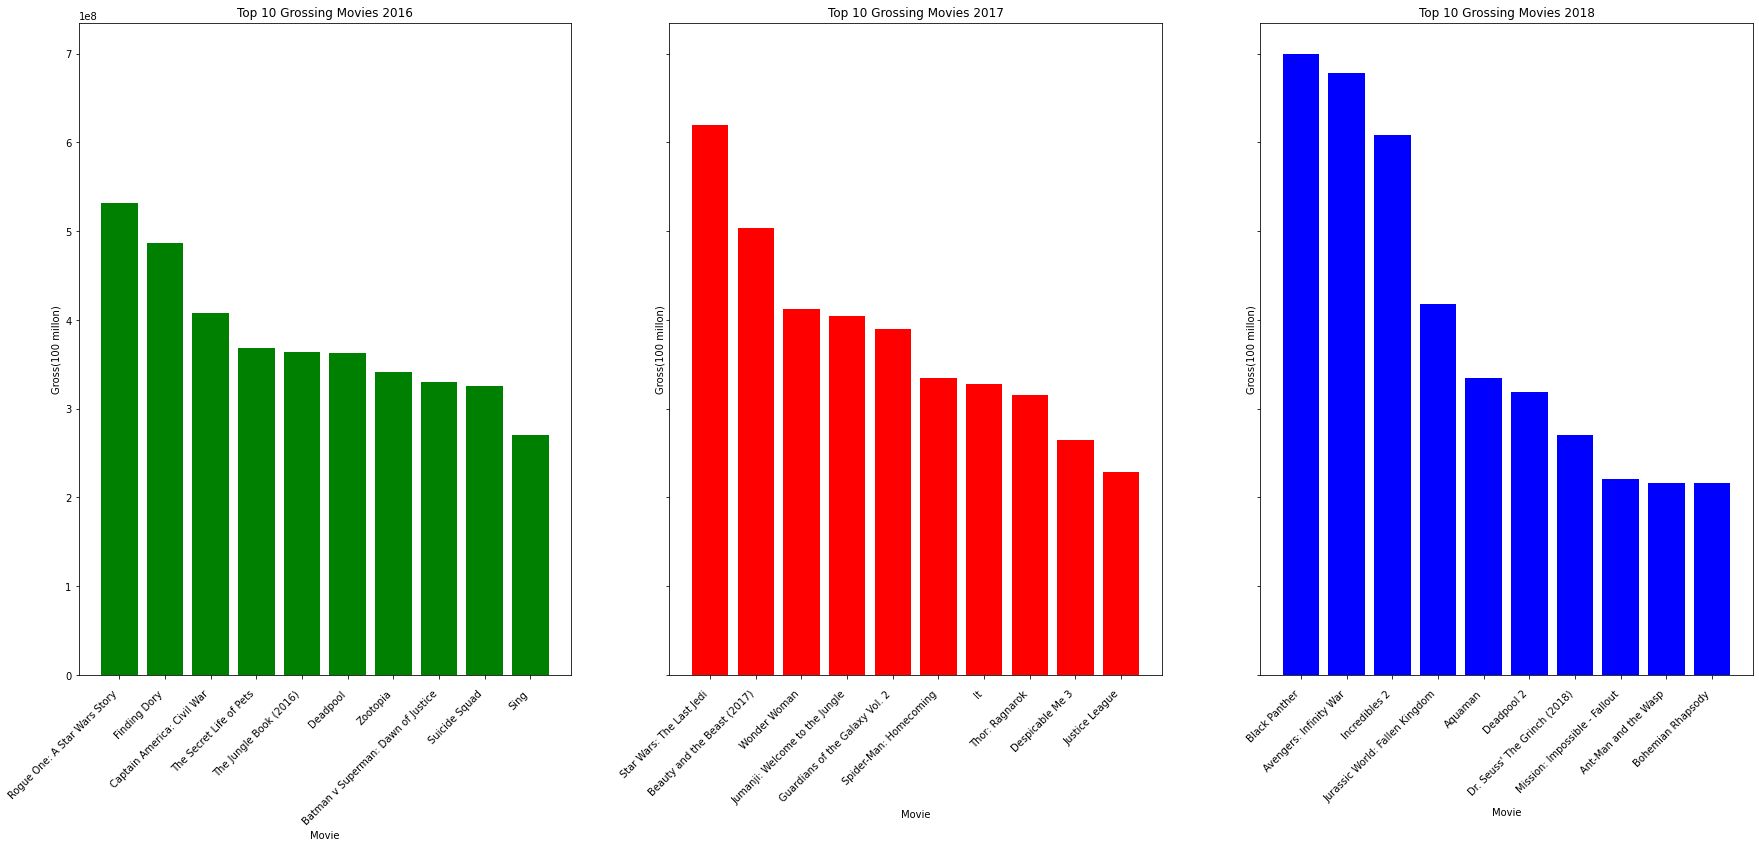

In [36]:
fig, axs = plt.subplots(1, 3, figsize=(30, 12), sharey=True)

## 2016
axs[0].bar(movie_gross2016['title'],
         movie_gross2016['domestic_gross'],
         color='g', align='center')
axs[0].set_title('Top 10 Grossing Movies 2016')
axs[0].set_xlabel('Movie')
axs[0].set_ylabel('Gross(100 millon)')
axs[0].set_xticklabels(movie_gross2016['title'], rotation=45,  va='top', ha='right')
axs[0].tick_params(axis="x", direction="out", pad=10)

## 2017
axs[1].bar(movie_gross2017['title'],
         movie_gross2017['domestic_gross'],
         color='r', align='center')
axs[1].set_title('Top 10 Grossing Movies 2017')
axs[1].set_xlabel('Movie')
axs[1].set_ylabel('Gross(100 millon)')
axs[1].set_xticklabels(movie_gross2017['title'], rotation=45,  va='top', ha='right')
axs[1].tick_params(axis="x", direction="out", pad=10)

## 2018
axs[2].bar(movie_gross2018['title'],
         movie_gross2018['domestic_gross'],
         color='b', align='center')
axs[2].set_title('Top 10 Grossing Movies 2018')
axs[2].set_xlabel('Movie')
axs[2].set_ylabel('Gross(100 millon)')
axs[2].set_xticklabels(movie_gross2018['title'], rotation=45,  va='top', ha='right')
axs[2].tick_params(axis="x", direction="out", pad=10)


These final graphs follow the same pattern specifically the years 2017 and 2018 which had 5 of their top 10 movies be superhero focused. Franchises are continued and some reach their climax(Avengers Infinity War)

### summary of graphs above

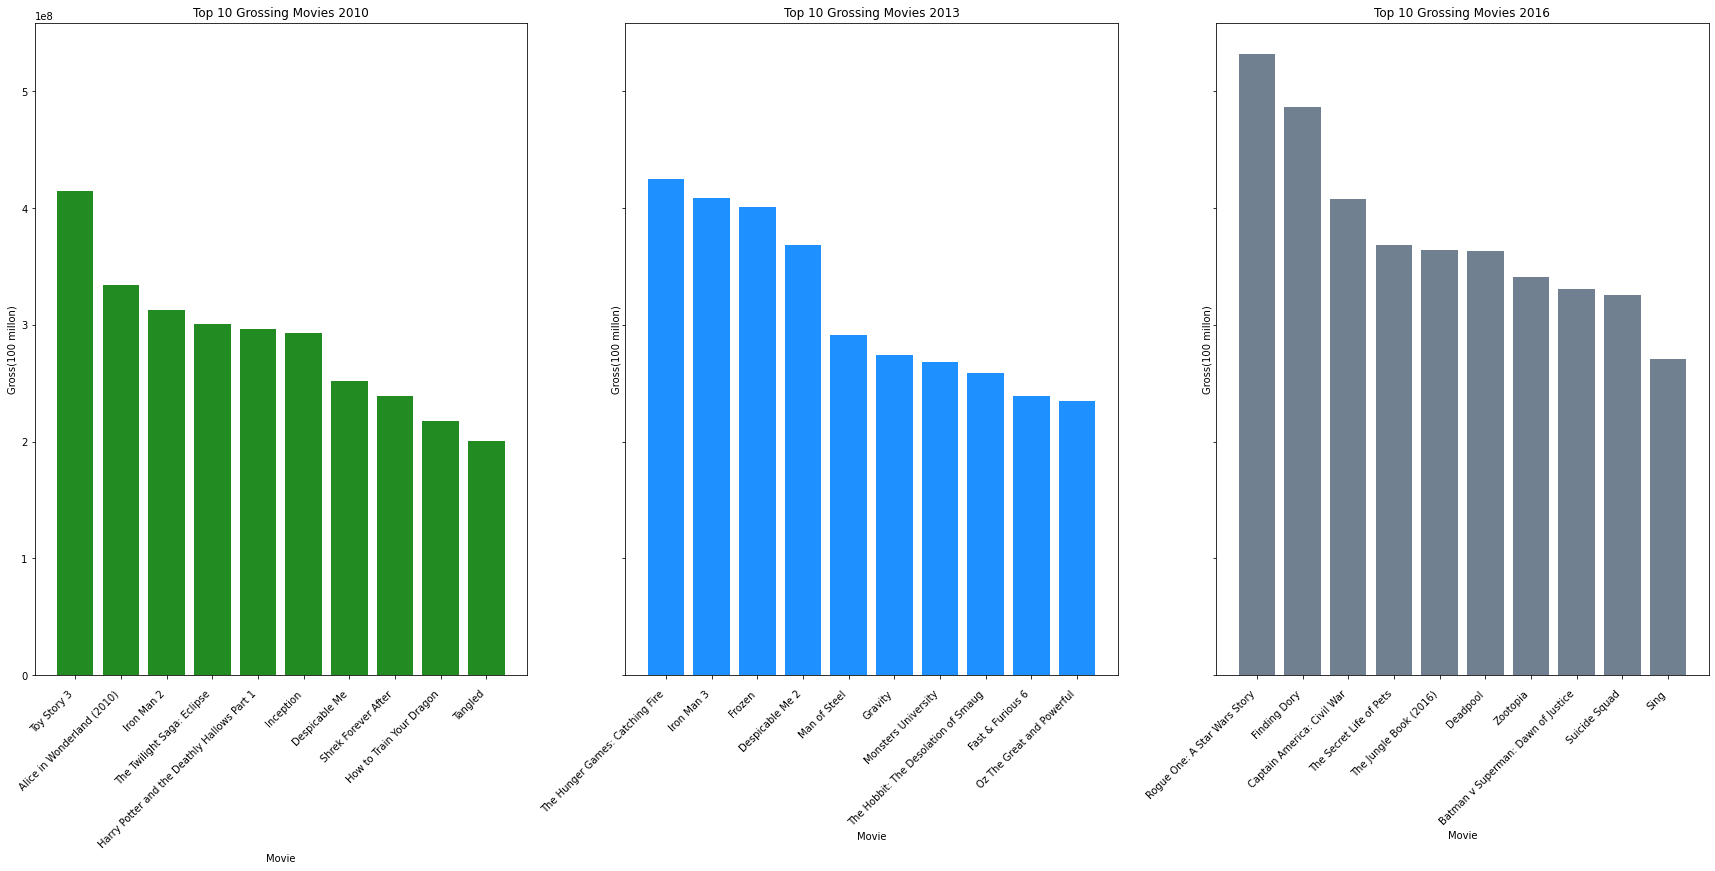

In [37]:
fig, axs = plt.subplots(1, 3, figsize=(30, 12), sharey=True)

## 2010
axs[0].bar(movie_gross2010['title'],
         movie_gross2010['domestic_gross'],
         color='forestgreen', align='center')
axs[0].set_title('Top 10 Grossing Movies 2010')
axs[0].set_xlabel('Movie')
axs[0].set_ylabel('Gross(100 millon)')
axs[0].set_xticklabels(movie_gross2010['title'], rotation=45,  va='top', ha='right')
axs[0].tick_params(axis="x", direction="out", pad=10)

## 2013
axs[1].bar(movie_gross2013['title'],
         movie_gross2013['domestic_gross'],
         color='dodgerblue', align='center')
axs[1].set_title('Top 10 Grossing Movies 2013')
axs[1].set_xlabel('Movie')
axs[1].set_ylabel('Gross(100 millon)')
axs[1].set_xticklabels(movie_gross2013['title'], rotation=45,  va='top', ha='right')
axs[1].tick_params(axis="x", direction="out", pad=10)

## 2016
axs[2].bar(movie_gross2016['title'],
         movie_gross2016['domestic_gross'],
         color='slategrey', align='center')
axs[2].set_title('Top 10 Grossing Movies 2016')
axs[2].set_xlabel('Movie')
axs[2].set_ylabel('Gross(100 millon)')
axs[2].set_xticklabels(movie_gross2016['title'], rotation=45,  va='top', ha='right')
axs[2].tick_params(axis="x", direction="out", pad=10)


### Top 10 Popular

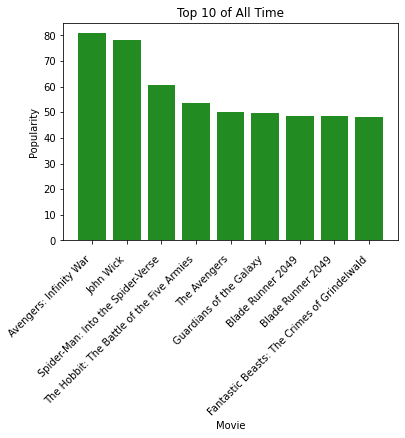

In [38]:

fig, ax = plt.subplots()

## TOP 10 of all time
ax.bar(popular['original_title'],
         popular['popularity'],
         color='forestgreen', align='center')
ax.set_title('Top 10 of All Time')
ax.set_xlabel('Movie')
ax.set_ylabel('Popularity')
ax.set_xticklabels(popular['original_title'], rotation=45,  va='top', ha='right')
ax.tick_params(axis="x", direction="out", pad=10)


This graph show how the top 10 popular movies since 1930. All of these movies are action focused and 4 of the 10 are superhero movies.

## Visualization Results

Data shows that over the years Superhero and Animation focused on action and adventure have dominated the movie industry. From these results we would recommend a studio to invest in action and animation. If possible establish a franchise(preferably superhero focused) that can be built upon with sequels and prequels.

## Genres and Domestic Gross
* [***Genre Data Cleaning***](#Genre-Data-Cleaning)

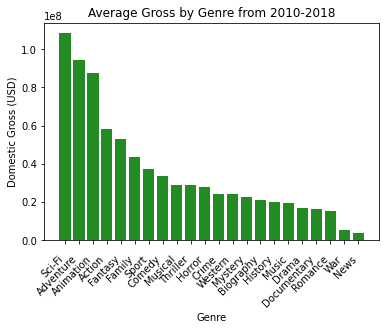

In [39]:
#bar plot of top movies
fig, axs = plt.subplots()

axs.bar(top_genres['genre'],
         top_genres['domestic_gross'], color ='forestgreen')
axs.set_title('Average Gross by Genre from 2010-2018')
axs.set_xlabel('Genre')
axs.set_ylabel('Domestic Gross (USD)')
axs.set_xticklabels(top_genres['genre'], rotation=45, va='top', ha='right')
axs.tick_params(axis="x", direction="out", pad=10)

The graph shows the top grossing genre in order. The top 4 are Sci-FI, Adventure, Animation and Action these results support our previous graphs which showed the top movies of each year.

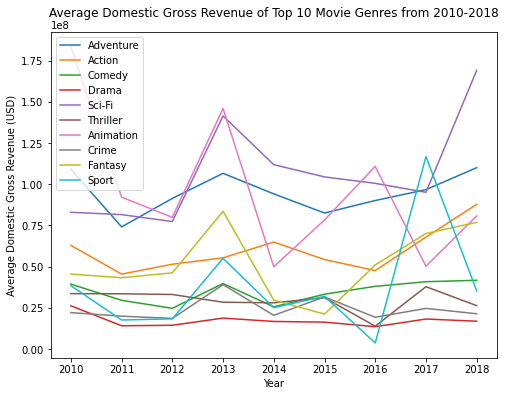

In [40]:
#create plot and call function to graph each of the top genres
plt.figure(figsize = (8,6))

for g in top_genres_list:
    plot_genres(g)

plt.title("Average Domestic Gross Revenue of Top 10 Movie Genres from 2010-2018", pad = 15)
plt.ylabel("Average Domestic Gross Revenue (USD)")
plt.xlabel('Year')

plt.legend()

plt.show()

Shows the Average domestic gross of each genre showing the highs and lows over the years. The graph shows how adventure and sci-fi have been on the rise while drama and crime have been consistent over the years. It also shows sports sharp decline.

## Which Genres are most often combined?

In [41]:
#from youtube, check the top genre combinations
from itertools import combinations
from collections import Counter

movie_basics = imdb_movie_basics

count = Counter()

grouped_genres = movie_basics['genres']

grouped_genres = grouped_genres.dropna()

grouped_genres = grouped_genres.astype(str)

for row in grouped_genres:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

In [42]:
combined_genres = pd.DataFrame.from_dict(count.most_common(10))
combined_genres.rename(columns = {0:'genre', 1:'count'}, inplace = True)
combined_genres['genre'] = combined_genres['genre'].astype(str)

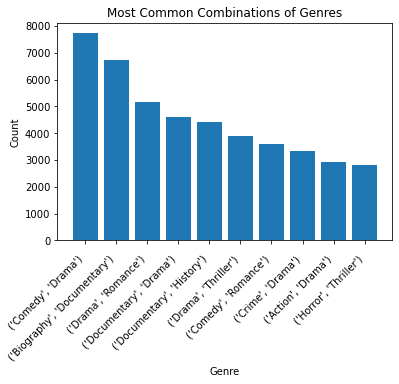

In [43]:
#bar plot of top movies
fig, axs = plt.subplots()

axs.bar(combined_genres['genre'],
         combined_genres['count'])
axs.set_title('Most Common Combinations of Genres')
axs.set_xlabel('Genre')
axs.set_ylabel('Count')
axs.set_xticklabels(combined_genres['genre'], rotation=45, va='top', ha='right')
axs.tick_params(axis="x", direction="out", pad=10)

This graph shows the top genre combinations Comedy and Drama being the most common.

# Recomendations

The most popular genres are scifi ,action, adventure, and animation are easily encapsulated by superheroes which you can see from the above plots and graphs. A new movie should focus on these genres. 

Data shows that over the years Superhero and Animation focused on action and adventure have dominated the movie industry. From these results we would recommend a studio to invest in action and animation. If possible establish a franchise(preferably superhero focused) that can be built upon with sequels and prequels.